In [1]:
# import pandas, random and numpy
import pandas as pd
from random import randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Make random data
def random_data(n):
    data = []
    cols = ['Suhu','Titik_Embun','Tekanan_Udara','Jarak_Pandang','Cuaca']
    for i in range(n):
        y = randint(1,3)
        if y == 1:
            a = randint(25,30)+float(randint(0,5)*0.1)
            b = randint(20,30)+float(randint(0,2)*0.1)
            c = 1000+randint(6,8)
            d = randint(4,8)+float(randint(0,8)*0.1)
        elif y == 2:
            a = randint(25,28)+float(randint(0,8)*0.1)
            b = randint(20,25)+float(randint(0,2)*0.1)
            c = 1000+randint(8,15)
            d = randint(8,10)+float(randint(0,8)*0.1)
        elif y == 3:
            a = randint(24,26)+float(randint(0,8)*0.1)
            b = randint(25,28)+float(randint(0,2)*0.1)
            c = 1000+randint(4,5)
            d = randint(1,3)+float(randint(0,8)*0.1)
        y = weighted(y)
        data.append([a,b,c,d,y])
    df = pd.DataFrame(data,columns=cols)
    return df

        
def weighted(status):
    if status == 1:
        return "Cerah"
    elif status == 2:
        return "Berawan"
    else:
        return "Hujan"

In [35]:
# call function
data = random_data(500)

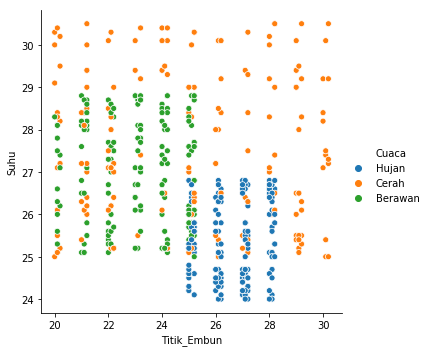

In [36]:
sns.relplot(x="Titik_Embun", y="Suhu", hue="Cuaca", data=data);

In [5]:
print(data['Cuaca'].unique())

['Cerah' 'Berawan' 'Hujan']


In [6]:
print(data.describe())

             Suhu  Titik_Embun  Tekanan_Udara  Jarak_Pandang
count  500.000000    500.00000     500.000000     500.000000
mean    27.163800     25.69780    1007.580000       5.875800
std      1.807752      2.61656       3.200639       3.118892
min     24.000000     20.00000    1004.000000       1.000000
25%     25.600000     24.20000    1005.000000       3.100000
50%     27.000000     26.00000    1007.000000       6.000000
75%     28.500000     27.20000    1009.000000       8.700000
max     30.500000     30.20000    1015.000000      10.800000


In [7]:
print(data['Cuaca'].value_counts())

Hujan      179
Cerah      165
Berawan    156
Name: Cuaca, dtype: int64


In [8]:
data.head()

,Suhu,Titik_Embun,Tekanan_Udara,Jarak_Pandang,Cuaca
0,30.1,27.0,1006,4.1,Cerah
1,27.8,23.0,1010,10.4,Berawan
2,28.5,20.2,1015,10.5,Berawan
3,27.8,23.1,1010,9.1,Berawan
4,28.0,30.2,1008,5.8,Cerah


In [37]:
df = data[['Suhu','Titik_Embun','Tekanan_Udara','Jarak_Pandang']]

In [38]:
label = data ['Cuaca']

In [39]:
df.head()

,Suhu,Titik_Embun,Tekanan_Udara,Jarak_Pandang
0,25.7,25.1,1005,3.4
1,26.7,27.2,1005,3.4
2,29.4,21.2,1008,6.8
3,24.1,28.1,1005,2.6
4,25.2,25.0,1004,1.2


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [41]:
train_x, test_x, train_y, test_y = train_test_split(df, label, test_size=0.30)

In [42]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
pred_y = clf.predict(test_x)

In [44]:
print (pred_y)

['Hujan' 'Berawan' 'Berawan' 'Hujan' 'Hujan' 'Cerah' 'Berawan' 'Hujan'
 'Berawan' 'Berawan' 'Berawan' 'Berawan' 'Hujan' 'Hujan' 'Hujan' 'Berawan'
 'Berawan' 'Cerah' 'Berawan' 'Cerah' 'Cerah' 'Hujan' 'Cerah' 'Berawan'
 'Berawan' 'Cerah' 'Berawan' 'Berawan' 'Cerah' 'Hujan' 'Hujan' 'Cerah'
 'Berawan' 'Cerah' 'Cerah' 'Cerah' 'Cerah' 'Berawan' 'Berawan' 'Berawan'
 'Cerah' 'Cerah' 'Hujan' 'Cerah' 'Berawan' 'Hujan' 'Berawan' 'Hujan'
 'Hujan' 'Hujan' 'Cerah' 'Hujan' 'Cerah' 'Berawan' 'Berawan' 'Cerah'
 'Berawan' 'Cerah' 'Cerah' 'Cerah' 'Cerah' 'Hujan' 'Hujan' 'Berawan'
 'Cerah' 'Hujan' 'Cerah' 'Berawan' 'Hujan' 'Berawan' 'Berawan' 'Cerah'
 'Berawan' 'Cerah' 'Hujan' 'Cerah' 'Hujan' 'Hujan' 'Hujan' 'Cerah'
 'Berawan' 'Cerah' 'Cerah' 'Hujan' 'Cerah' 'Cerah' 'Cerah' 'Berawan'
 'Berawan' 'Hujan' 'Cerah' 'Berawan' 'Berawan' 'Berawan' 'Hujan' 'Berawan'
 'Berawan' 'Cerah' 'Cerah' 'Hujan' 'Berawan' 'Berawan' 'Berawan' 'Berawan'
 'Berawan' 'Hujan' 'Hujan' 'Cerah' 'Berawan' 'Berawan' 'Cerah' 'Cerah'
 'Ce

In [17]:
index = test_x.index.tolist()

In [45]:
score = accuracy_score(test_y,pred_y)
print(score)

0.9933333333333333


In [46]:
akurasiTrain=clf.score(train_x,train_y)
print (akurasiTrain)

0.9885714285714285


In [47]:
akurasiTest=clf.score(test_x,test_y)
print (akurasiTest)

0.9933333333333333


In [48]:
print("Balanced Accuracy :",balanced_accuracy_score(test_y,pred_y))
print("Confusion Matrix :\n",confusion_matrix(test_y,pred_y))
print("Precision, Recall, F1 Score :",precision_recall_fscore_support(test_y,pred_y, average='macro'))

Balanced Accuracy : 0.9941520467836257
Confusion Matrix :
 [[50  0  0]
 [ 1 56  0]
 [ 0  0 43]]
Precision, Recall, F1 Score : (0.9934640522875817, 0.9941520467836257, 0.993749817459622, None)


In [49]:
hasilAkurasi = []
for i in range (1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    akurasiTest=accuracy_score(test_y,pred_y)
    hasilAkurasi.append(akurasiTest)

In [50]:
print (hasilAkurasi)

[0.98, 0.96, 0.9933333333333333, 0.9866666666666667, 1.0, 0.9866666666666667, 0.9933333333333333, 0.9866666666666667, 0.9866666666666667]


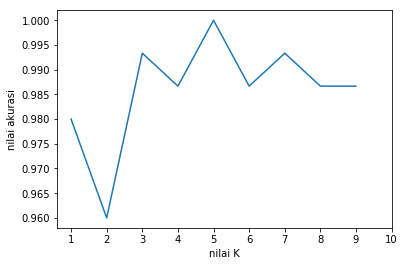

In [51]:
plt.plot(hasilAkurasi)
plt.ylabel('nilai akurasi')
plt.xlabel('nilai K')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()